In [4]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd # Import pandas to work with DataFrames

In [6]:
pip install ipywidgets --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
from datasets import load_dataset

# Beispiel: MultiCoNER Dataset laden
dataset = load_dataset('unimelb-nlp/wikiann', 'de')

# Struktur anzeigen (erste 5 Einträge des Trainingssets)
print(dataset['train'][:5])

{'tokens': [['als', 'Teil', 'der', 'Savoyer', 'Voralpen', 'im', 'Osten', '.'], ['WEITERLEITUNG', 'Antonina', 'Wladimirowna', 'Kriwoschapka'], ['**', "''", 'Lou', 'Salomé', "''", '.'], ['Spieler', 'vom', 'SKA', 'Sankt', 'Petersburg', 'ausgewählt', 'sowie', 'anschließend', 'im', 'NHL', 'Entry', 'Draft', 'in', 'der', 'ersten', 'Runde', 'als', 'insgesamt', 'zehnter', 'Spieler', 'von', 'den', 'Minnesota', 'Wild', '.'], ['Jaan', 'Kirsipuu', '74', 'P', '.']], 'ner_tags': [[0, 0, 0, 5, 6, 0, 0, 0], [0, 1, 2, 2], [0, 0, 1, 2, 0, 0], [0, 0, 3, 4, 4, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0], [1, 2, 0, 0, 0]], 'langs': [['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de'], ['de', 'de', 'de', 'de'], ['de', 'de', 'de', 'de', 'de', 'de'], ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de'], ['de', 'de', 'de', 'de', 'de']], 'spans': [['LOC: Savoyer Voralpen'], ['PER: Antonina Wladimirowna 

In [8]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset['train']) # Create a DataFrame named df

df.head() # Now you can call head() on df


,tokens,ner_tags,langs,spans
0,"[als, Teil, der, Savoyer, Voralpen, im, Osten, .]","[0, 0, 0, 5, 6, 0, 0, 0]","[de, de, de, de, de, de, de, de]",[LOC: Savoyer Voralpen]
1,"[WEITERLEITUNG, Antonina, Wladimirowna, Kriwos...","[0, 1, 2, 2]","[de, de, de, de]",[PER: Antonina Wladimirowna Kriwoschapka]
2,"[**, '', Lou, Salomé, '', .]","[0, 0, 1, 2, 0, 0]","[de, de, de, de, de, de]",[PER: Lou Salomé]
3,"[Spieler, vom, SKA, Sankt, Petersburg, ausgewä...","[0, 0, 3, 4, 4, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, ...","[de, de, de, de, de, de, de, de, de, de, de, d...","[ORG: SKA Sankt Petersburg, ORG: NHL Entry Dra..."
4,"[Jaan, Kirsipuu, 74, P, .]","[1, 2, 0, 0, 0]","[de, de, de, de, de]",[PER: Jaan Kirsipuu]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    20000 non-null  object
 1   ner_tags  20000 non-null  object
 2   langs     20000 non-null  object
 3   spans     20000 non-null  object
dtypes: object(4)
memory usage: 625.1+ KB


In [10]:
df.describe()

,tokens,ner_tags,langs,spans
count,20000,20000,20000,20000
unique,18517,5230,58,17007
top,"[', '', China, '', ']","[0, 0, 5, 0, 0]","[de, de, de, de, de]","[LOC: Papst, PER: Johannes Paul II .]"
freq,30,802,2954,35


In [11]:
df.columns

Index(['tokens', 'ner_tags', 'langs', 'spans'], dtype='object')

In [12]:
# Examine entity distribution to show distribution of different entity types in the dataset:
entity_counts = df['ner_tags'].value_counts()
print(entity_counts)

ner_tags
[0, 0, 5, 0, 0]                                                          802
[1, 2, 2]                                                                737
[0, 1, 2, 2]                                                             480
[0, 0, 0, 5, 0, 0]                                                       470
[0, 0, 3, 4, 0, 0]                                                       300
                                                                        ... 
[0, 0, 0, 0, 0, 5, 3, 4, 4, 4, 0, 0, 0]                                    1
[0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0]                                    1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0]      1
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 5, 0, 0]                           1
[5, 0, 3, 4, 4, 0, 0]                                                      1
Name: count, Length: 5230, dtype: int64


In [13]:
# Check for class imbalance to identify if certain entity types are underrepresented:
entity_percentages = (entity_counts / len(df)) * 100
print(entity_percentages)

ner_tags
[0, 0, 5, 0, 0]                                                          4.010
[1, 2, 2]                                                                3.685
[0, 1, 2, 2]                                                             2.400
[0, 0, 0, 5, 0, 0]                                                       2.350
[0, 0, 3, 4, 0, 0]                                                       1.500
                                                                         ...  
[0, 0, 0, 0, 0, 5, 3, 4, 4, 4, 0, 0, 0]                                  0.005
[0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0]                                  0.005
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0]    0.005
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 5, 0, 0]                         0.005
[5, 0, 3, 4, 4, 0, 0]                                                    0.005
Name: count, Length: 5230, dtype: float64


In [14]:
# Analyze token length distribution to provide insights into the length of the individual tokens (words) in the dataset:
df['token_lengths'] = df['tokens'].apply(lambda x: [len(token) for token in x])
token_lengths = [length for lengths in df['token_lengths'] for length in lengths]
print(pd.Series(token_lengths).describe())
# count: total, mean: average length, std: standard deviation in characters, min: shortest token, max: longest token, %: percentage of tokens

count    195387.000000
mean          5.056196
std           3.791692
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          45.000000
dtype: float64


In [15]:
# Visualize the entity distribution in the dataset by creating a horizontal bar plot:
# Get the label mapping from the dataset first, wo we can see the labels instead of just the numbers 0-6:
label_list = dataset['train'].features['ner_tags'].feature.names
label_mapping = {i: label for i, label in enumerate(label_list)}


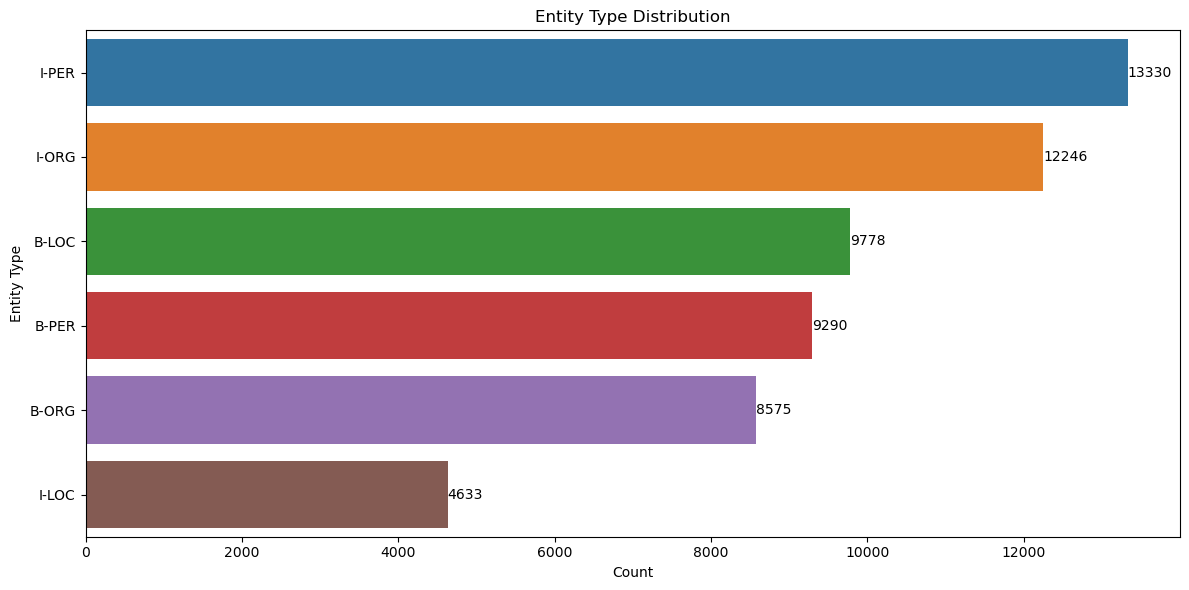

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each entity type
entity_counts = df['ner_tags'].apply(lambda x: [tag for tag in x if tag != 0]).explode().value_counts()

# Map numeric encodings to actual entity labels
entity_counts_labeled = entity_counts.rename(index=label_mapping)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=entity_counts_labeled.values, y=entity_counts_labeled.index, orient='h')

# Customize the plot
plt.title('Entity Type Distribution')
plt.xlabel('Count')
plt.ylabel('Entity Type')

# Add count labels to the end of each bar
for i, v in enumerate(entity_counts_labeled.values):
    plt.text(v + 0.1, i, str(v), va='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



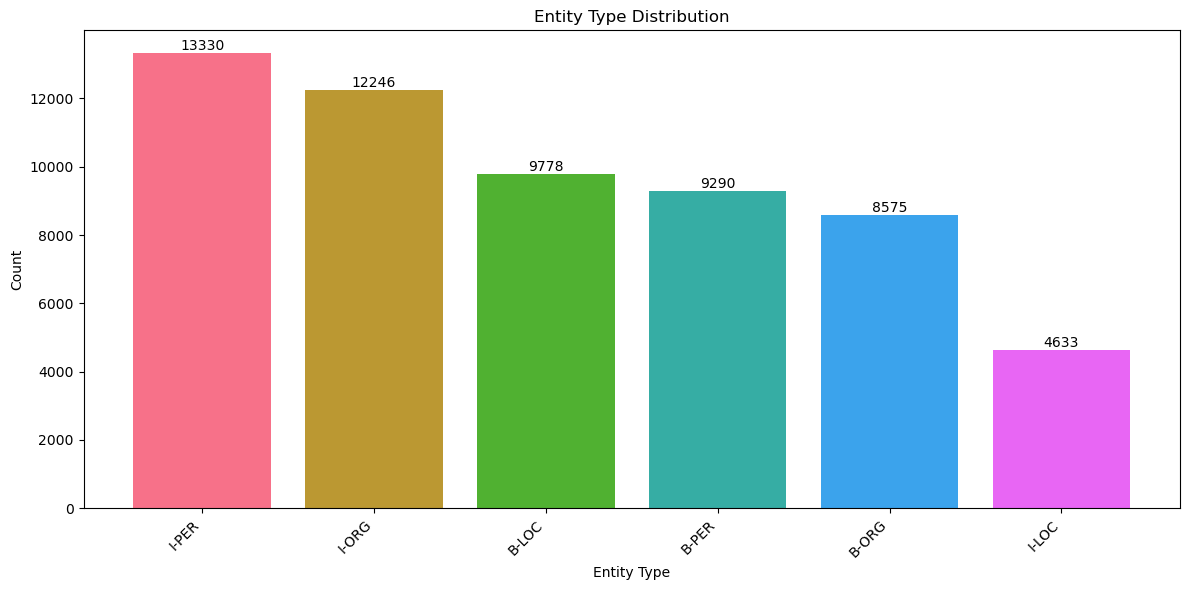

In [17]:
# alternative Darstellung :)
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's create a mapping from numeric codes to entity labels
label_list = dataset['train'].features['ner_tags'].feature.names
label_mapping = {i: label for i, label in enumerate(label_list)}

# Now, let's map the entity counts to their actual labels
entity_counts_labeled = entity_counts.rename(index=label_mapping)

plt.figure(figsize=(12, 6))

# Use seaborn's color palette for distinct colors
colors = sns.color_palette("husl", len(entity_counts_labeled))

# Create the bar plot with different colors
bars = plt.bar(entity_counts_labeled.index, entity_counts_labeled.values, color=colors)

plt.title('Entity Type Distribution')
plt.xlabel('Entity Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [18]:
# Check for missing values to identify missing data in the dataset:
print(df.isnull().sum())


tokens           0
ner_tags         0
langs            0
spans            0
token_lengths    0
dtype: int64


In [19]:
# Examine unique tokens to give me an idea of the vocabulary size in the dataset:
unique_tokens = set([token for tokens in df['tokens'] for token in tokens])
print(f"Number of unique tokens: {len(unique_tokens)}")


Number of unique tokens: 39081


In [20]:
# Analyze sentence length distribution to get insight on the length of sentences in the dataset:
df['sentence_length'] = df['tokens'].apply(lambda x: len(x))
print(df['sentence_length'].describe())


count    20000.000000
mean         9.769350
std          6.205004
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         85.000000
Name: sentence_length, dtype: float64
